**AUTHOR**- Prakash Kumar Singh

**Intern at Sparks Foundation GRIP**

**Domain**- Data Science And Business Analytics

**Task 3**- Exploratory Data Analyisis- `RETAIL`

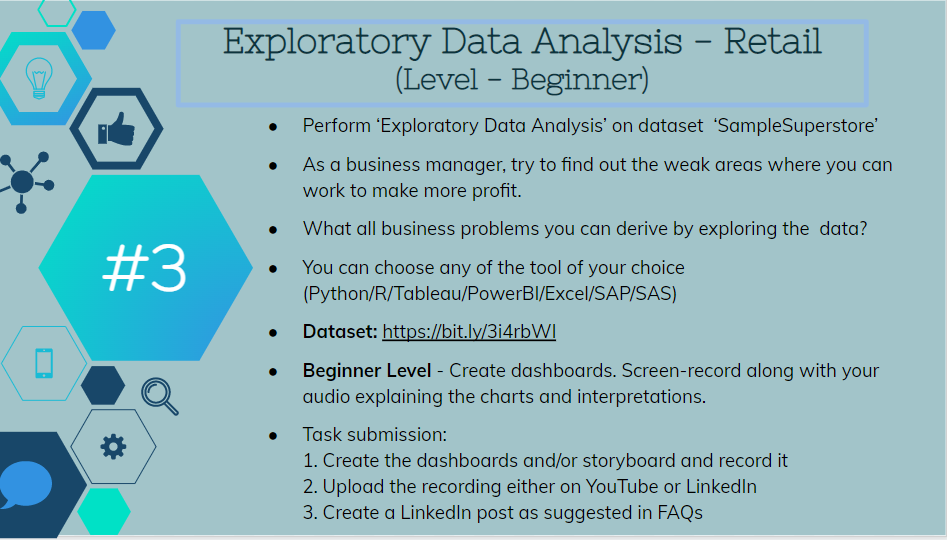

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2- **[Baisc checks](#checks)**
3. **[Data Cleaning](#Clean)**
    - 3.1 - [Duplicate Values](#Dupli)
    - 3.2 - [Outlier Analysis and Treatment](#outliers)

<a id="lib"></a>
# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import sweetviz as sv

# <a id="prep"></a>
# 2. Data Preparation

# <a id="read"></a>
## 2.1 Understand the Data

**read the dataset and display first 5 lines.**

In [3]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<a id="checks"></a>
# 2.2 basic check

In [4]:
#basic check 
df.shape
print(f'\nData has {df.shape[0]} rows and {df.shape[1]} columns' )


Data has 9994 rows and 13 columns


In [5]:
#checking datatypes
print(df.dtypes)
print('\n\nPostal code datatype wrongly mentioned as int, so changing datatype as object')
df['Postal Code']=df['Postal Code'].astype('object')

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


Postal code datatype wrongly mentioned as int, so changing datatype as object


In [6]:
#pulliing statstical report or five point summary for numerical features
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**iNFERENCE:**

1. count of all the features are same so we can analyize that there is no missing values in the data.

2. some of the Data points in profit is negative , these data points  are showing loss incurred by the superstatores.

3. The Range between the minimum and maximum value of Sales feature is high , so there can be possible outliers in the dataset.

In [7]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,631,4,3,17
top,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,263,3203,6026,1523


**iNFERENCE:**

1. The top shipment mode used for product shipments is Standar class.

2. new york city and california has the highest customores compare to other city and states.

3. Ofice supplies are the highest selling category and in that binders are the most selling object.

4. we can drop country and postal code as they are not showing much variation in the dataset.

In [8]:
#dropping country and postal code.
df.drop(columns=['Country','Postal Code'],inplace=True)

In [9]:
#checking for null value
print(df.isna().sum())
print('\n\nThere is no missing values in the Dataset')

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


There is no missing values in the Dataset


# using auto Eda tool to visualize the data at first glance

In [20]:
#using sweetviz
sweet_report=sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<a id="Dupli"></a>
# 3.1Duplicate values


In [11]:
#checking for duplicate values
print(f'\n\nduplicate values in the dataset: {df.duplicated().sum()}')
print(f'\n{df.duplicated().sum()} duplicate value dropped from the datset')
df.drop_duplicates(inplace=True)




duplicate values in the dataset: 50

50 duplicate value dropped from the datset


<a id="outliers"></a>
# 3.2 Outliers analysis and treatment

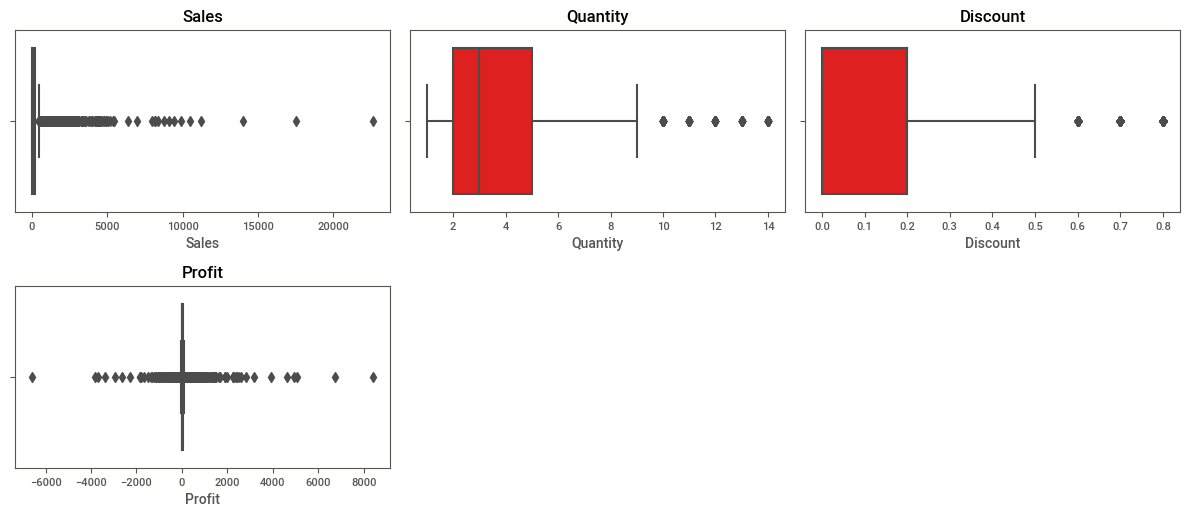

In [12]:
#checking outliers using boxplot
n=1
plt.rcParams['figure.figsize']=[12,10]
for i in df.describe().columns:
    plt.subplot(4,3,n)
    n+=1
    sns.boxplot(df[i],color='Red')
    plt.title(f'{i.title()}', weight='bold')
    plt.tight_layout()

**here by visualizing box plot we can see that there are outliers present in the Data, although these data points can be extreme values as dataset belongs to the category of sales and revenue , so we are going to leave these datapoints for further analysis as they are important for the business prespective.**

# Univariate analysis

In [13]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [14]:
df.describe(include='object').columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

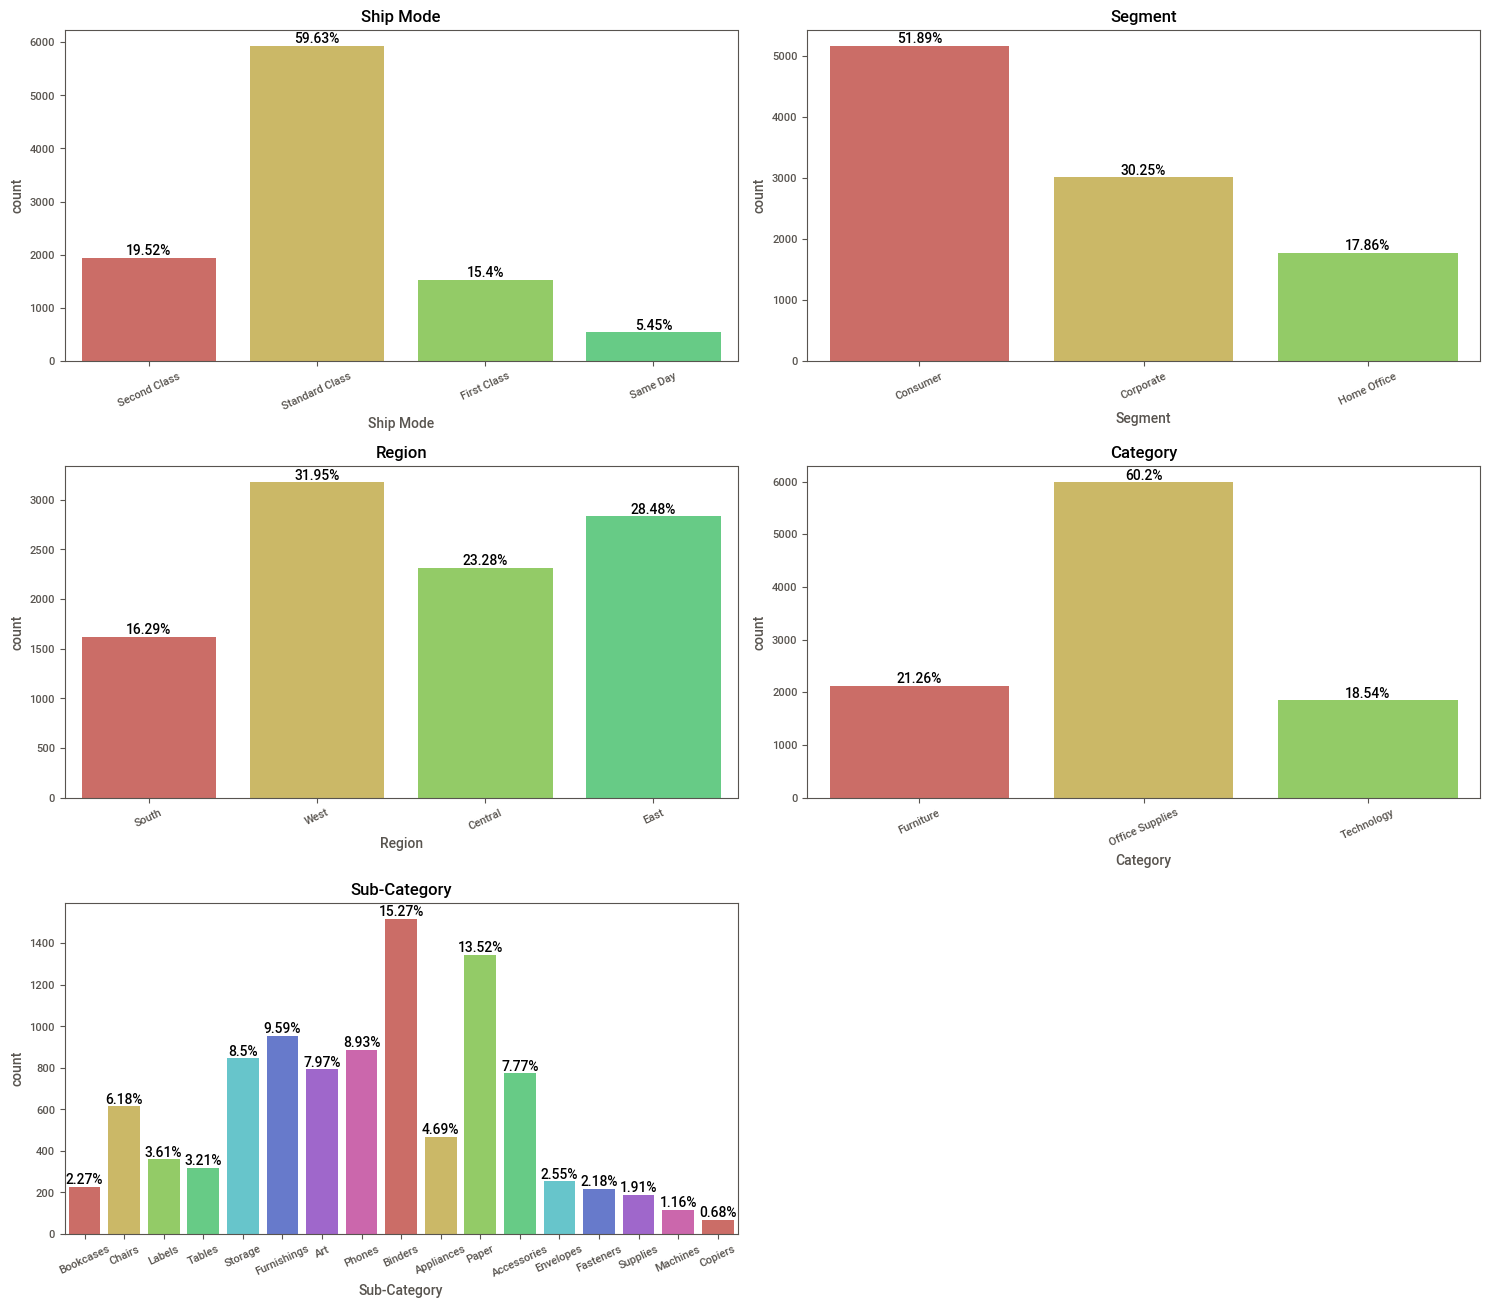

In [15]:
#plotting countplot for some categoriacal variable
plt.figure(figsize=(15,30),dpi=100)
n=1
col=['Ship Mode', 'Segment', 'Region', 'Category','Sub-Category']
for i in col:
    plot=plt.subplot(7,2,n)
    n+=1
    sns.countplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.xticks(rotation=25)
    plt.tight_layout()
    annot_percent(plot)

# Bivariate analysis

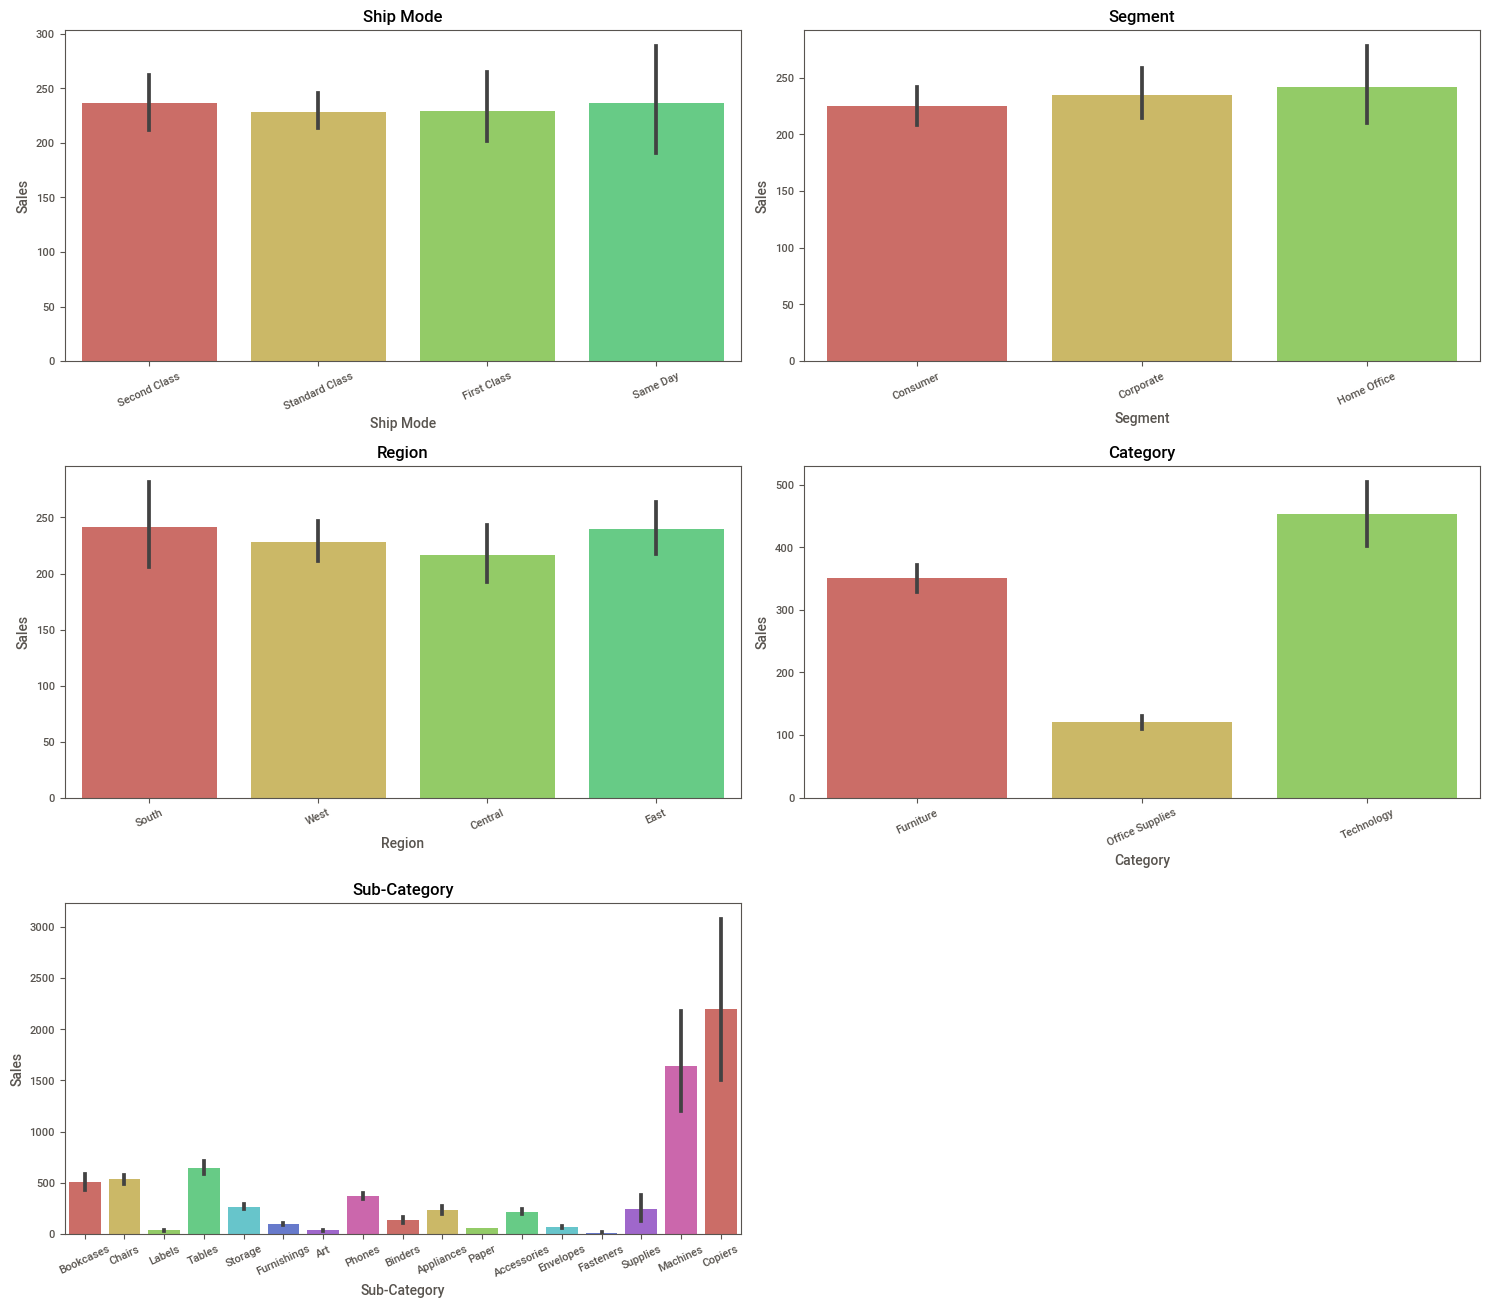

In [16]:
plt.figure(figsize=(15,30),dpi=100)
n=1
col=['Ship Mode', 'Segment', 'Region', 'Category','Sub-Category']
for i in col:
    plot=plt.subplot(7,2,n)
    n+=1
    sns.barplot(x=df[i] ,palette=sns.color_palette("hls", 8),y=df['Sales'])
    plt.title(f'{i.title()}',weight='bold')
    plt.xticks(rotation=25)
    plt.tight_layout()
 

**INTERPRETATION:**

1.although same day shipment has highest number of sales , but there is no such difference in sales of product shiped through other shipment mode. so shopment mode has no such effect on sales.

2. office supply has the highest sales in terms of amount.

3. south and east region have almost equally contributed region in terms of sales.

4. Technology are the highest selling category in terms of sales amount and copiers and machineries are the highest selling product.



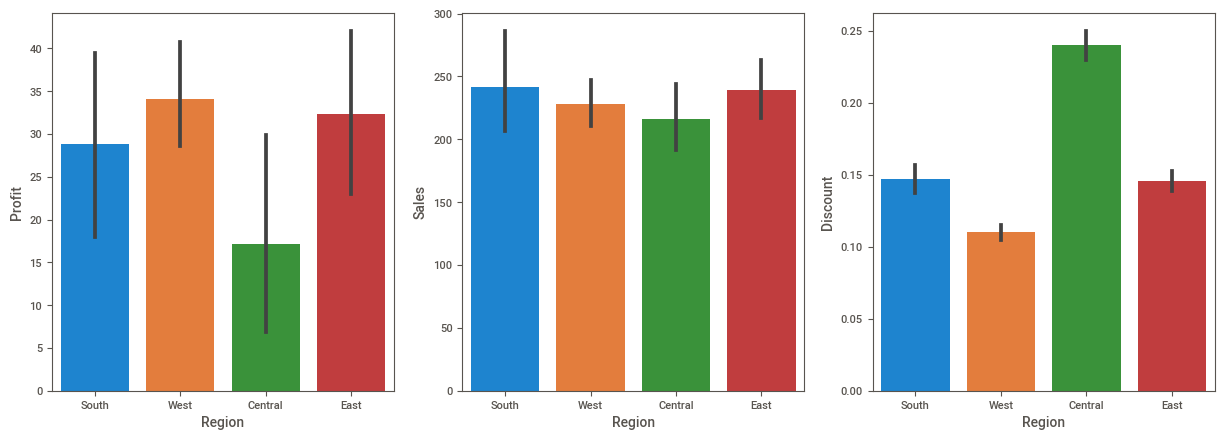

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Region', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Region', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Region', y='Discount', data=df, ax=ax[2])
plt.show()

**INTERPRETATION:**
    
1. West region has highest profit and also 3rd highest sales and lowest discount compare to other regions.

2. central region superstores has the highest discount but low sales and profit comparing to other regions.

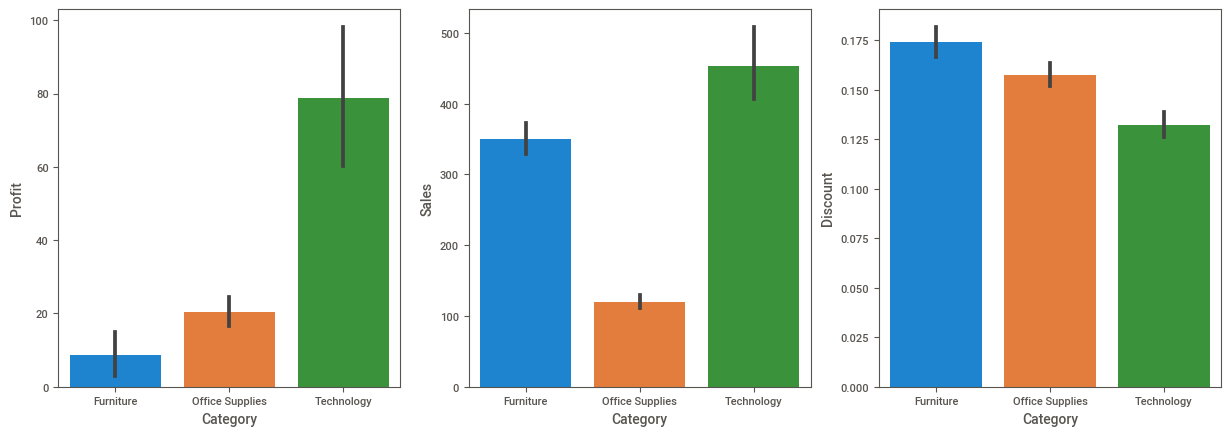

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2])
plt.show()

**INTERPRETATION:**

1. Technical product has highest amount of sales , highest profit with low discount.

2. despite having high disccount on furniture and office supplies product , the amount of sales and profit is low for the furniture peoduct.

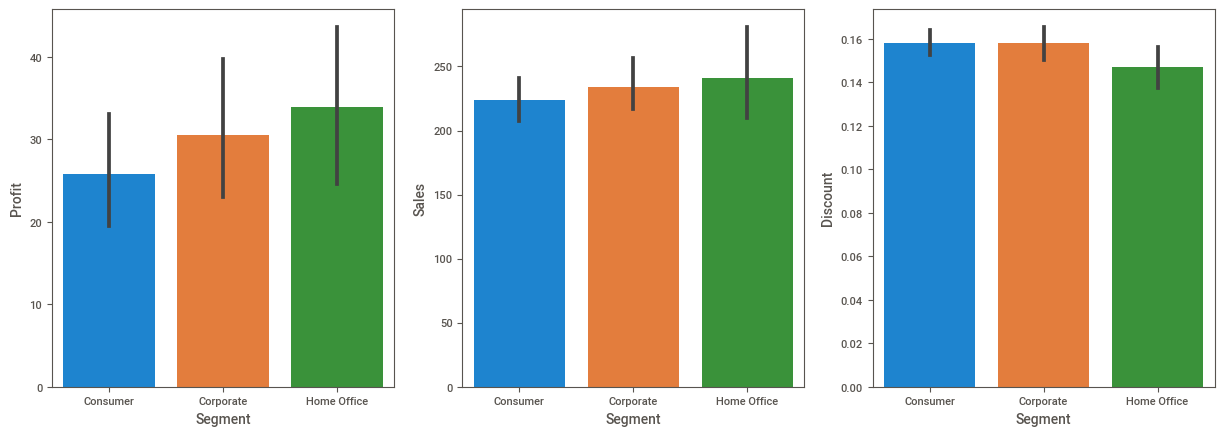

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2])
plt.show()


**INTERPRETATION:**

1. Home office segment have highest sales , highest profit and lowest discount so, home office segment performing well.

2. despite having highest discount , consumer and corporate segments are performs lower than the home office segment.

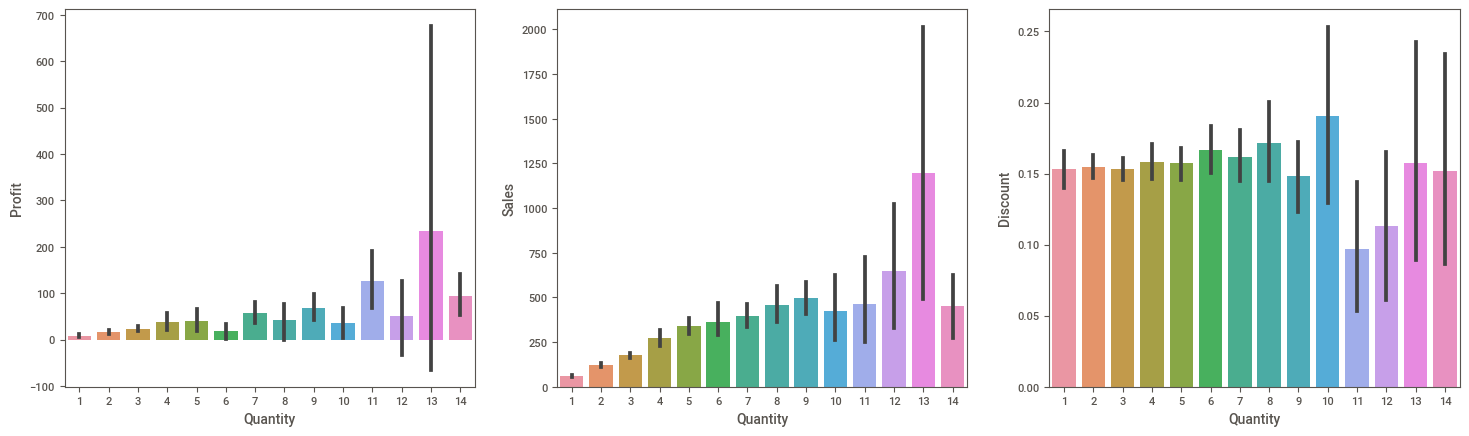

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2])
plt.show()


**INTERPRETATION:**

1. apart from quantity 13 , highest the quantity sold , highest is the discount , but lower profits.

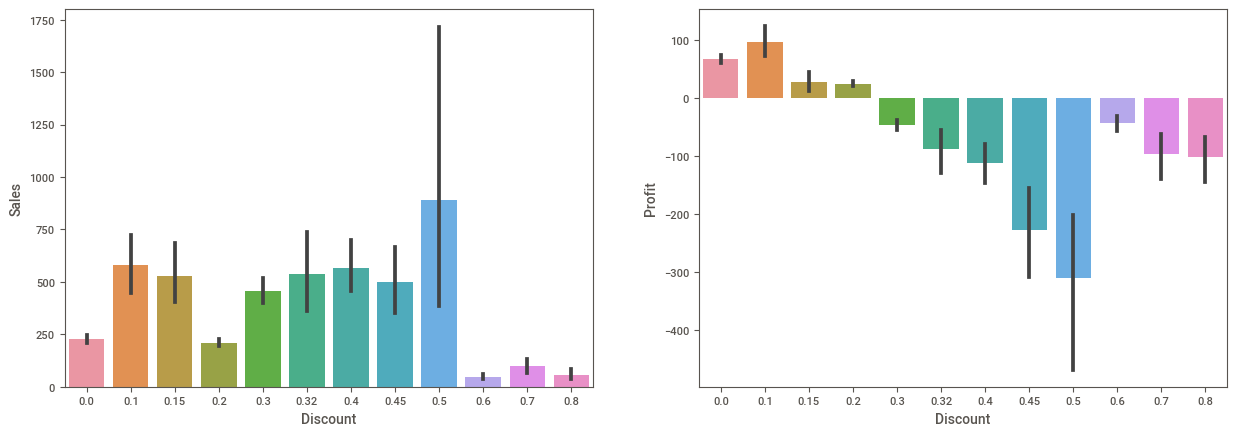

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Discount', y='Sales', data=df, ax=ax[0])
sns.barplot(x='Discount', y='Profit', data=df, ax=ax[1])
plt.show()


**INTERPRETATION:**

1.Despite giving highest discount on sales , profit is lowest for high discount.

# MULTIVARIATE ANALYSIS

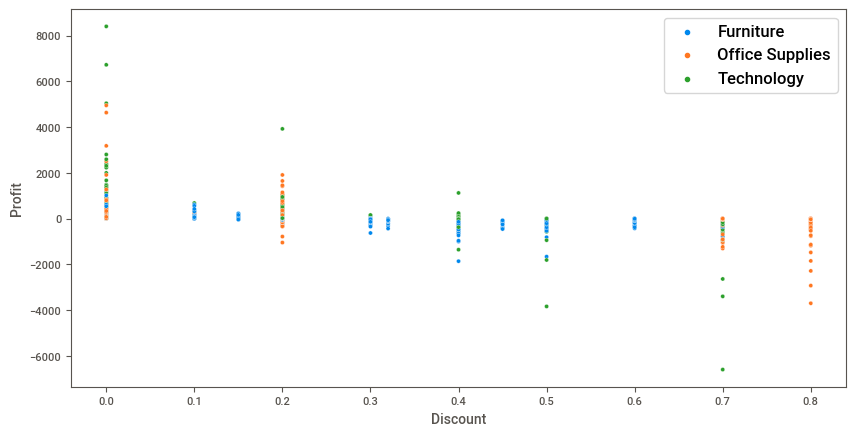

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df);
ax.legend(fontsize=12)
plt.show()


**INTERPRETATION:**

1.Office Supplies has maximum loss at 80% discount

2.Furniture and Technology have maximum loss between 30% to 50%

3.Technology also has maximum loss profit at 70%

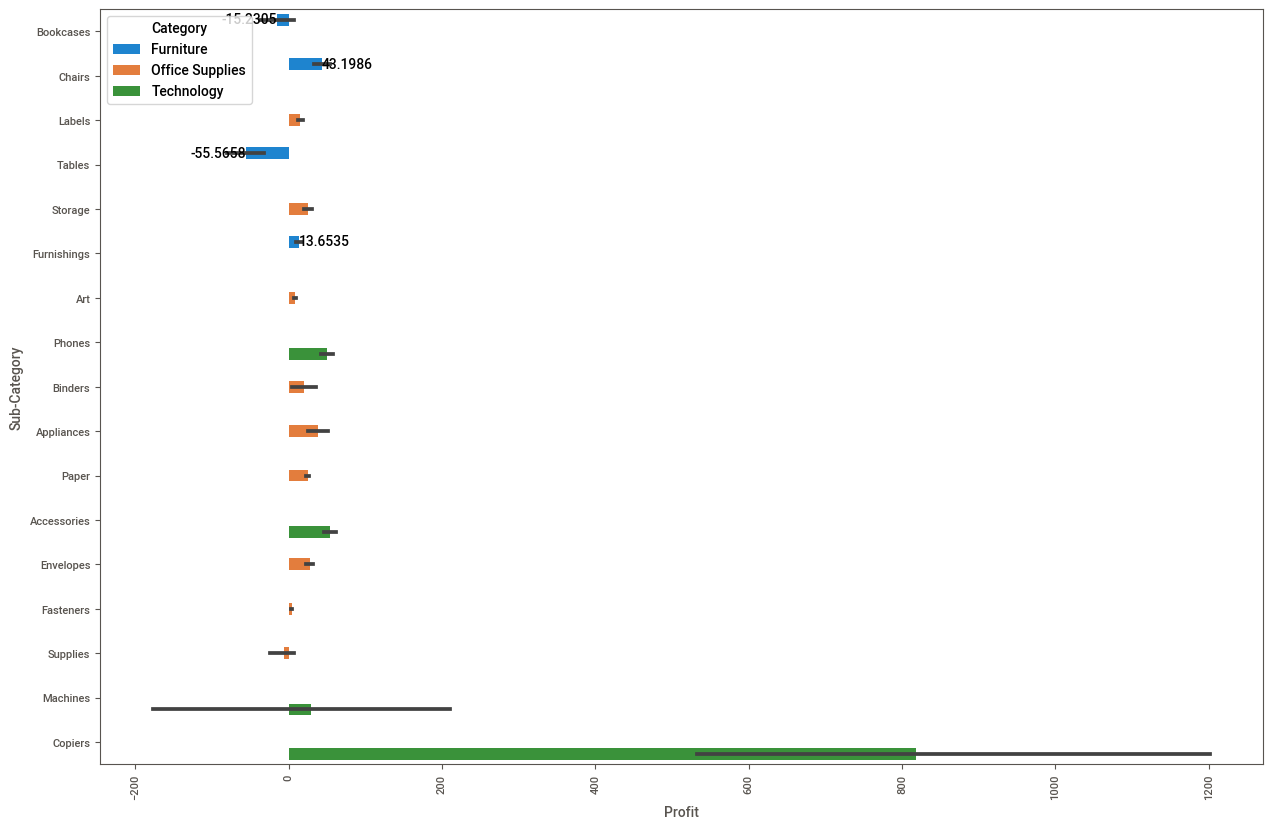

In [116]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y='Sub-Category', x='Profit',hue='Category' ,data=df);
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()


**INTERPRETATION:** Tables and Supplies and Bookcases have negative profit

<AxesSubplot:xlabel='State'>

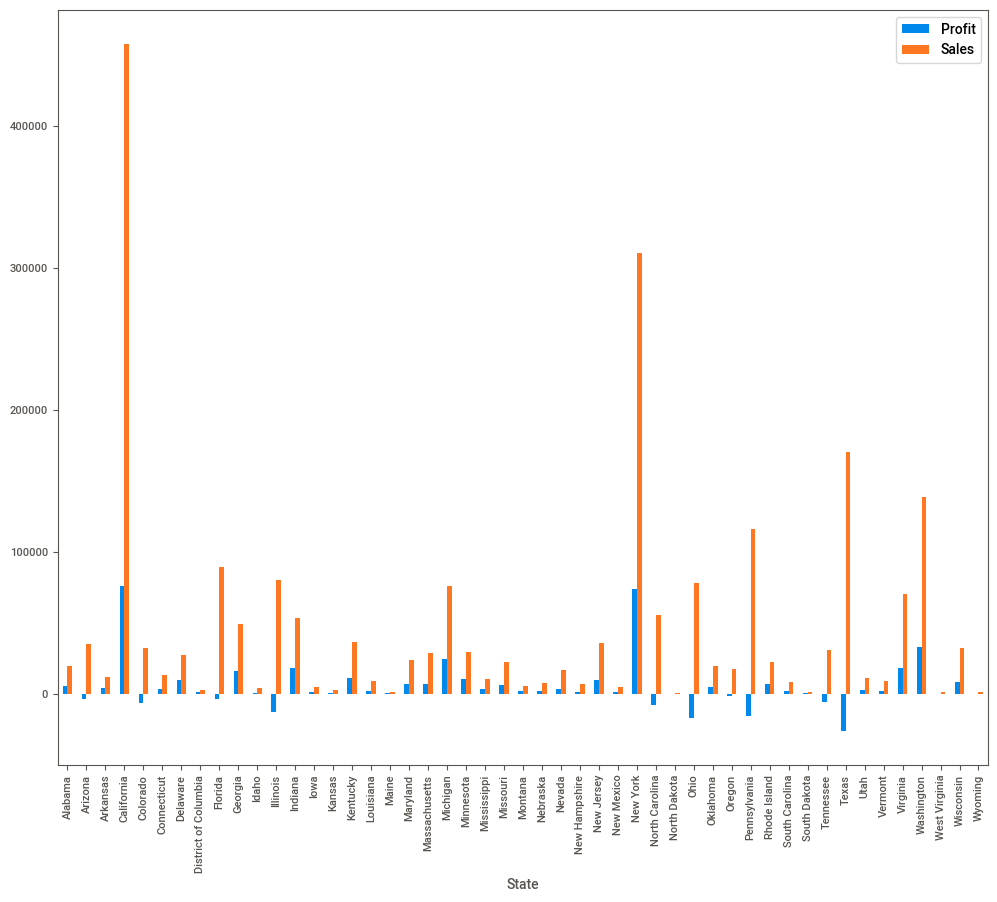

In [122]:
pd.pivot_table(data=df,index='State',values=['Profit','Sales'],aggfunc='sum').plot(kind='bar')

**INTERPRETATION:** 
    
 1. New york and california state has the highest sales and highest profit.
 
 2. Despite having good sales in colarado , florida, lionnis, north carolina , ohio ,pennsylvania , and taxes , superstores incurred losses in these states.

# Weak areas where Manager can work to make more profit.


1. Sales and Profit are not in linear for most States

2. central region superstores has the highest discount but low sales and profit comparing to other regions. Central region needs more attention.
3. Furniture and Office Supplies have high loss despite having  high discount

4. Office Supplies has maximum loss at 80% and 0% discount, so discount on these items should be reviewed.

5. Furniture and Technology have maximum loss between 30% to 50% discount.

6. Technology also has maximum loss profit at 70% discount

7. Tables and Supplies and Bookases in sub_category have negative profit

8. despite having highest discount , consumer and corporate segments are performs lower than the home office segment.
   so consumer segment needs urgent attention.
   
9. despite having high disccount on furniture and office supplies product , the amount of sales and profit is low for the      furniture peoduct. so sample these segment also need an urgent attention.